In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
import scipy.ndimage as snd
import scipy.integrate as sint

In [8]:
def fn(x,n):
    return x**n/(1+x**n)

frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**3
frvip = lambda x: (x>0)*x**3

In [9]:
def plot_sst_vip_nullclines(W,hcoupling=1,inp_vip=0.5,inp=0,inp_horiz=0):
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

    spacer = 0.01

    for irpc,rpc in enumerate(np.linspace(0,0.2,20)):
        plt.subplot(1,20,irpc+1)
        rssts = np.linspace(0,10,1000)
        rvip_inf = np.zeros_like(rssts)
        for i_sst,rsst in enumerate(rssts):
            r = np.array((rpc,rsst,0))
            h = np.array((0,0,inp_vip))
            rvip_inf[i_sst] = frtotal(W.dot(r) + h)[2]

        plt.plot(rssts,rvip_inf)

        rvips = np.linspace(0,rvip_inf.max(),100)
        rsst_inf = np.zeros_like(rvips)
        for i_vip,rvip in enumerate(rvips):
            r = np.array((rpc,0,rvip))
            h = np.array((inp,0,inp_vip))
            rsst_inf[i_vip] = frtotal(W.dot(r) + h)[1]

        plt.plot(rsst_inf,rvips)

        plt.axis('off')

#         plt.xlim((rsst_inf.min()-spacer,rsst_inf.max()+spacer))
#         plt.ylim((rvip_inf.min()-spacer,rvip_inf.max()+spacer))
        plt.xlim((-spacer,rsst_inf.max()+spacer))
        plt.ylim((-spacer,rvip_inf.max()+spacer))
#         plt.xlim((-spacer,0.4+spacer))
#         plt.ylim((-spacer,0.4+spacer))

In [ ]:
def plot_sst_vip_nullclines_big(W,hcoupling=1,inp_vip=0.5,inp=0,inp_horiz=0):
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

    spacer = 0.01

    for irpc,rpc in enumerate(np.linspace(0,0.2,20)):
        plt.subplot(1,20,irpc+1)
        rssts = np.linspace(0,10,1000)
        rvip_inf = np.zeros_like(rssts)
        for i_sst,rsst in enumerate(rssts):
            r = np.array((rpc,rsst,0))
            h = np.array((0,0,inp_vip,0,0,inp_vip))
            rvip_inf[i_sst] = frtotal(W.dot(r) + h)[2]

        plt.plot(rssts,rvip_inf)

        rvips = np.linspace(0,rvip_inf.max(),100)
        rsst_inf = np.zeros_like(rvips)
        for i_vip,rvip in enumerate(rvips):
            r = np.array((rpc,0,rvip))
            h = np.array((inp,0,inp_vip))
            rsst_inf[i_vip] = frtotal(W_big.dot(r) + h)[1]

        plt.plot(rsst_inf,rvips)

        plt.axis('off')

#         plt.xlim((rsst_inf.min()-spacer,rsst_inf.max()+spacer))
#         plt.ylim((rvip_inf.min()-spacer,rvip_inf.max()+spacer))
        plt.xlim((-spacer,rsst_inf.max()+spacer))
        plt.ylim((-spacer,rvip_inf.max()+spacer))
#         plt.xlim((-spacer,0.4+spacer))
#         plt.ylim((-spacer,0.4+spacer))

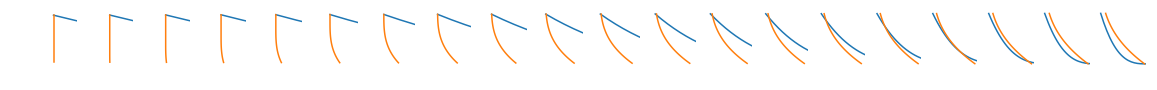

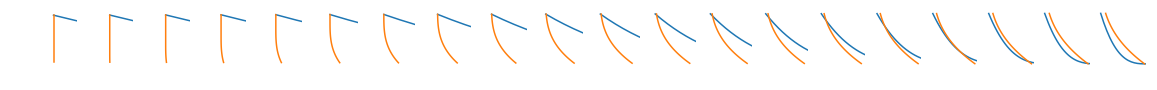

In [13]:
Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both

W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
plt.figure(figsize=(20,1))
inp_horiz = 1
inp = 0.4
plot_sst_vip_nullclines(W,inp=inp,inp_horiz=inp_horiz)

plt.figure(figsize=(20,1))
inp_horiz = 0
inp = 0.4
plot_sst_vip_nullclines(W,inp=inp,inp_horiz=inp_horiz)

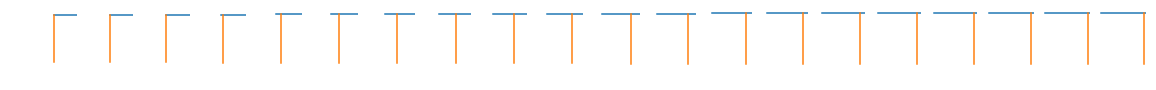

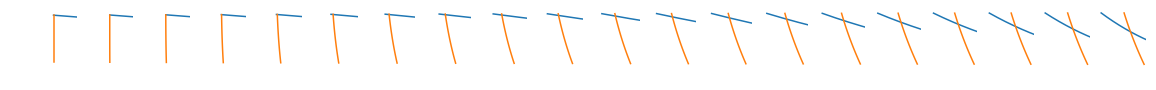

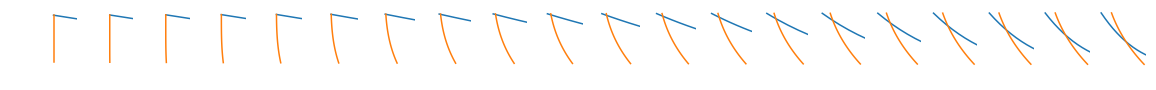

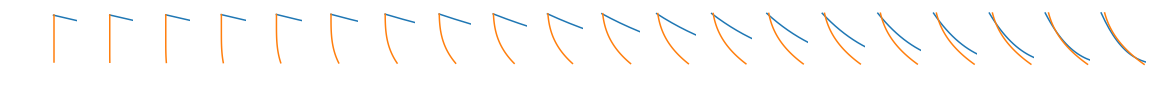

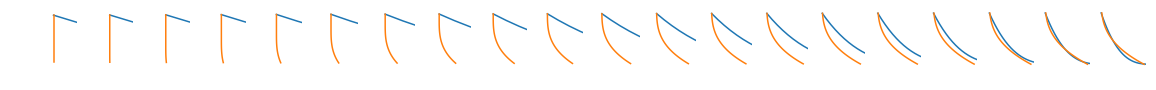

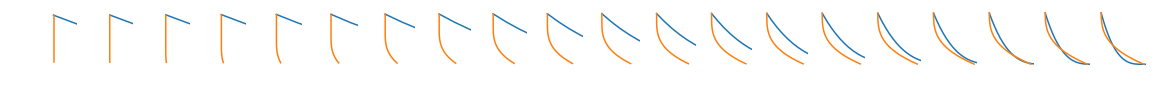

In [5]:
#     Wpp = 1
#     Wps = 1.5
#     Wsp = 3.3
#     Wpv = 0
#     Wvp = 0.7
#     Wvs = 2.1
#     Wsv = 1.3

Wpp = 1
Wps = 2
Wsp = 3
Wpv = 0
Wvp = 1
for w in range(6):
    alpha = 0.67
    Wvs = w*alpha
    Wsv = w*(1-alpha)

    W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
    plt.figure(figsize=(20,1))
    plot_sst_vip_nullclines(W)

NameError: name 'r0' is not defined

AttributeError: 'NoneType' object has no attribute 'shape'

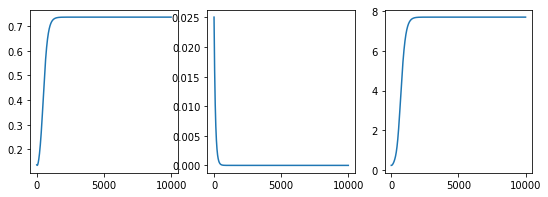